# Using my favorite PlotNine python module for Bikeshare EDA

In [230]:
##Importing packages for the analysis
import pandas as pd

import plotnine as p9

import numpy as np

import os as os

from scipy.stats import boxcox

In [111]:
os.getcwd()

'/Users/vigneshramesh/Bike_sharing_exercise'

In [193]:
##Read the pickle created in the dataset loading module
train_df = pd.read_pickle('./hourly_cnt.pkl')

train_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


   hour  total_count
0     0        39130
1     1        24164
2     2        16352
3     3         8174
4     4         4428
5     5        14261
6     6        55132
7     7       154171
8     8       261001
9     9       159438
10   10       126257
11   11       151320
12   12       184414
13   13       184919
14   14       175652
15   15       183149
16   16       227748
17   17       336860
18   18       309772
19   19       226789
20   20       164550
21   21       125445
22   22        95612
23   23        63941


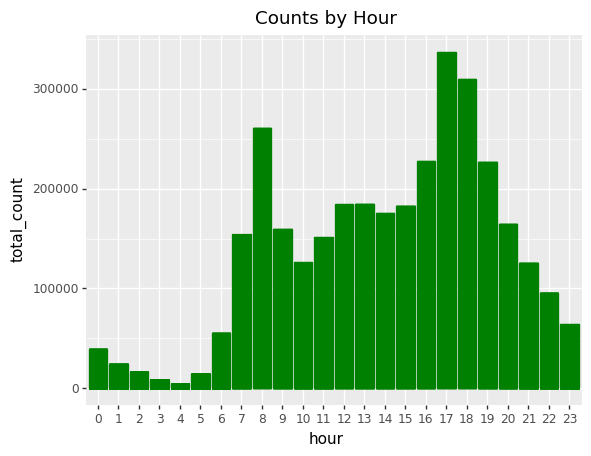

<ggplot: (-9223372036562259845)>

In [163]:
## Time for some EDA and plotting, Ready, set ... go!

## What is the hourly distribution of counts?
train_by_hour = train_df.groupby(['hour'])['total_count'].sum().to_frame()

train_by_hour = train_by_hour.reset_index()

print(train_by_hour)
(p9.ggplot(data = train_df,mapping = p9.aes(x = 'hour',y = 'total_count')) + p9.geom_bar(stat = 'identity',color = 'green',fill='green') + p9.ggtitle('Counts by Hour'))

  season  total_count
0      1       471348
1      2       918589
2      3      1061129
3      4       841613


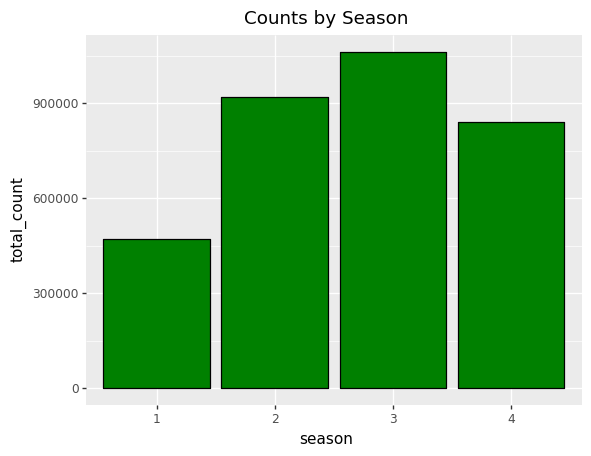

<ggplot: (-9223372036561292677)>

In [172]:

train_by_season = train_df.groupby(['season'])['total_count'].sum().to_frame()

train_by_season = train_by_season.reset_index()

print(train_by_season)

(p9.ggplot(data = train_by_season,mapping = p9.aes(x = 'season',y = 'total_count')) + p9.geom_bar(stat="identity",color = 'black',fill = 'green') + p9.ggtitle("Counts by Season"))

   hour season  total_count
0     0      1         4878
1     0      2        10459
2     0      3        13822
3     0      4         9971
4     1      1         3229
..  ...    ...          ...
91   22      4        21871
92   23      1         7994
93   23      2        17661
94   23      3        22986
95   23      4        15300

[96 rows x 3 columns]


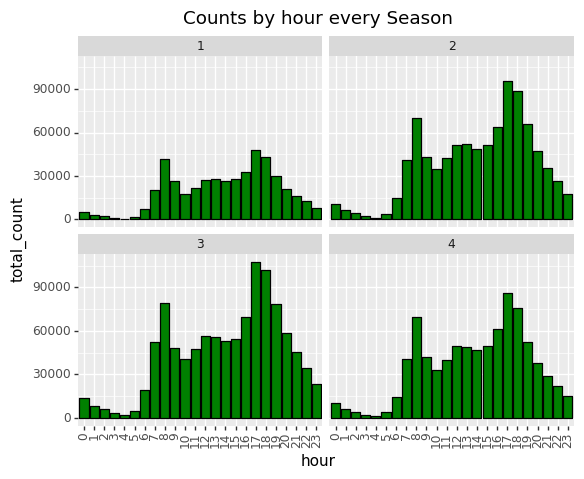

<ggplot: (291505167)>

In [218]:

train_by_hour_season = train_df.groupby(['hour','season'])['total_count'].sum().to_frame()

train_by_hour_season = train_by_hour_season.reset_index()

print(train_by_hour_season)

(p9.ggplot(data = train_by_hour_season,mapping = p9.aes(x = 'hour',y = 'total_count'))
 + p9.geom_bar(stat = 'identity',color = 'black',fill = 'green') + p9.facet_wrap('season') 
 + p9.theme(axis_text_x = p9.element_text(angle=90,hjust = 10)) + p9.ggtitle('Counts by hour every Season'))


  is_holiday  total_count
0          0      3214244
1          1        78435


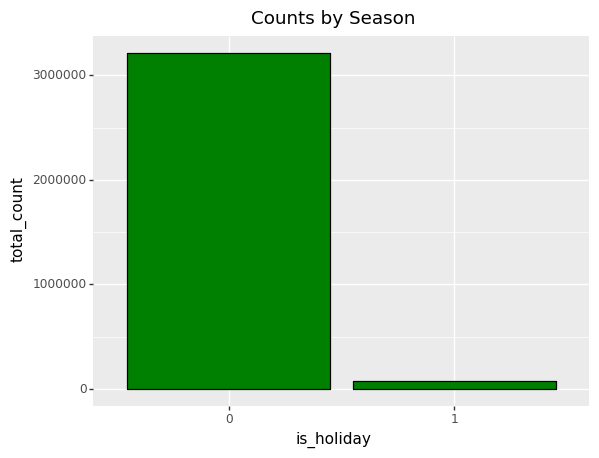

<ggplot: (-9223372036567475512)>

In [170]:
## How about counts for isHoliday?
## WOW ! What a significant difference!

train_by_holiday = train_df.groupby(['is_holiday'])['total_count'].sum().to_frame()

train_by_holiday = train_by_holiday.reset_index()

print(train_by_holiday)

(p9.ggplot(data = train_by_holiday,mapping = p9.aes(x = 'is_holiday',y = 'total_count')) + p9.geom_bar(stat="identity",color = 'black',fill = 'green') + p9.ggtitle("Counts by Season"))

  is_workingday  total_count
0             0      1000269
1             1      2292410


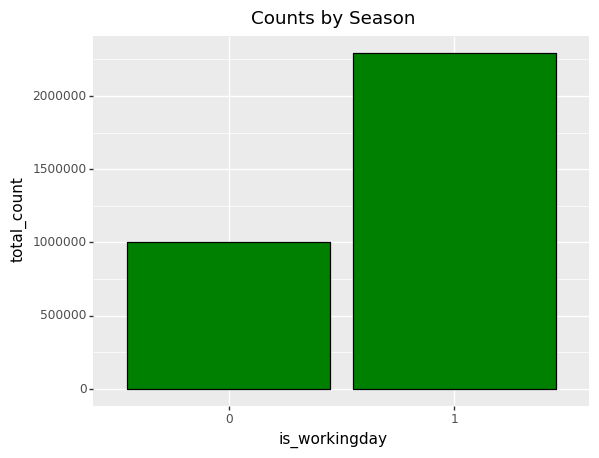

<ggplot: (-9223372036567119100)>

In [171]:
## Counts for working day?

train_by_wd = train_df.groupby(['is_workingday'])['total_count'].sum().to_frame()

train_by_wd = train_by_wd.reset_index()

print(train_by_wd)

(p9.ggplot(data = train_by_wd,mapping = p9.aes(x = 'is_workingday',y = 'total_count')) + p9.geom_bar(stat="identity",color = 'black',fill = 'green') + p9.ggtitle("Counts by Season"))

  weekday  total_count
0       0       444027
1       1       455503
2       2       469109
3       3       473048
4       4       485395
5       5       487790
6       6       477807


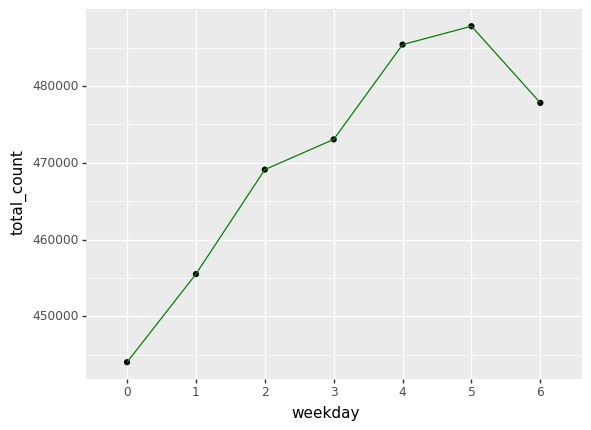

<ggplot: (-9223372036563251624)>

In [180]:
## Counts by weekday


train_by_wkd = train_df.groupby(['weekday'])['total_count'].sum().to_frame()

train_by_wkd = train_by_wkd.reset_index()

print(train_by_wkd)

(p9.ggplot(data = train_by_wkd,mapping = p9.aes(x = 'weekday',y = 'total_count',group = 1)) + p9.geom_point() + p9.geom_line(color = 'green'))

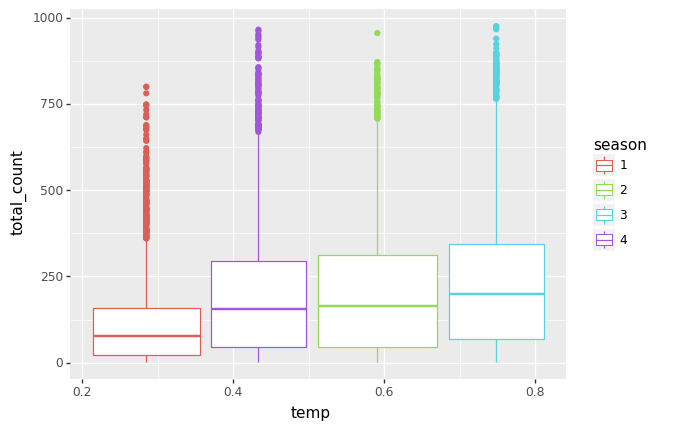

<ggplot: (-9223372036564351102)>

In [192]:
## Counts by temp/season

(p9.ggplot(data = train_df,mapping = p9.aes(x = 'temp',y = 'total_count',color = 'season')) + p9.geom_())

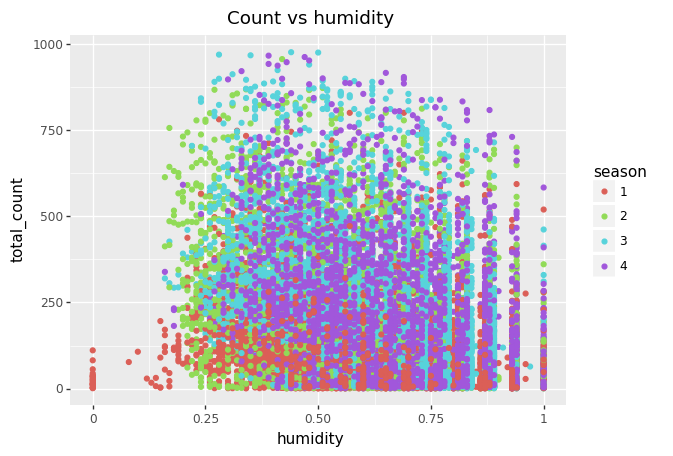

<ggplot: (287533639)>

In [216]:
(p9.ggplot(data = train_df,mapping = p9.aes(x = 'humidity',y = 'total_count',color = 'season')) + p9.geom_point(stat = 'identity') + p9.ggtitle("Count vs humidity")) 

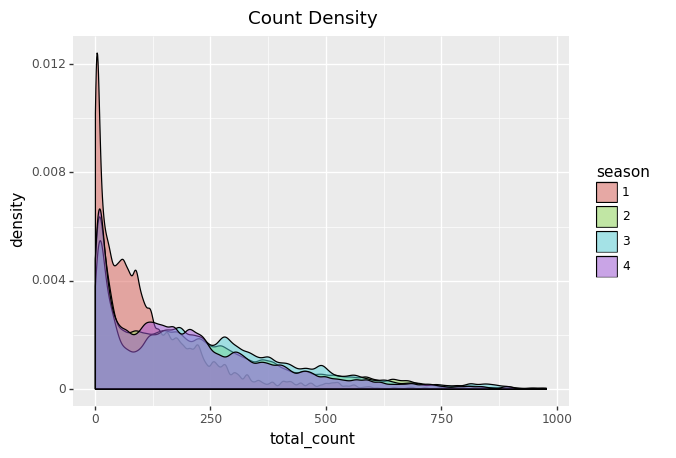

<ggplot: (-9223372036567434734)>

In [225]:
## The count density plot has a very long right tail, this calls for a log/box-cox transformation
(p9.ggplot(data=train_df, mapping=p9.aes(x='total_count', fill='season')) + p9.geom_density(adjust = 1/4, alpha=0.5) + p9.ggtitle('Count Density')) 

In [227]:
train_df['lncount'] = np.log(train_df.total_count)

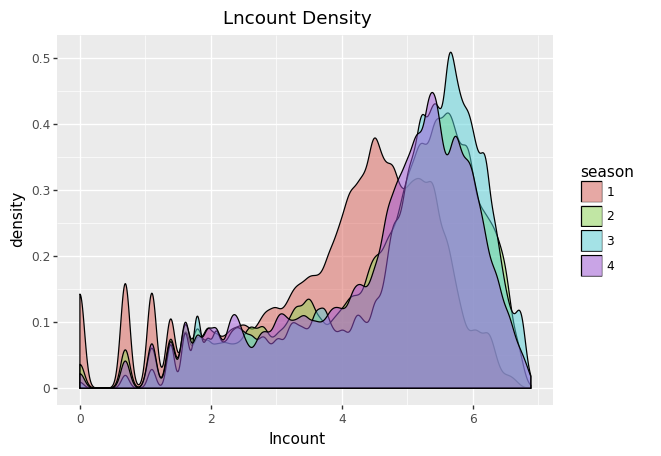

<ggplot: (-9223372036561293410)>

In [229]:
## The log transform somewhat reduces the skewness, but Im sure boxcox will look better!
(p9.ggplot(data=train_df, mapping=p9.aes(x='lncount', fill='season')) + p9.geom_density(adjust = 1/4, alpha=0.5) + p9.ggtitle('Lncount Density')) 

In [235]:
## Box cox does look better!
train_df['boxcoxcnt'] = boxcox(train_df['total_count'])[0]

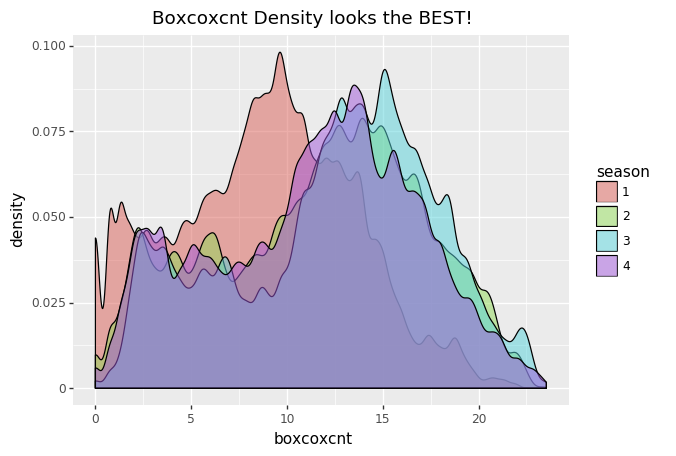

<ggplot: (-9223372036562627405)>

In [237]:
(p9.ggplot(data=train_df, mapping=p9.aes(x='boxcoxcnt', fill='season')) + p9.geom_density(adjust = 1/4, alpha=0.5) + p9.ggtitle('Boxcoxcnt Density looks the BEST!')) 

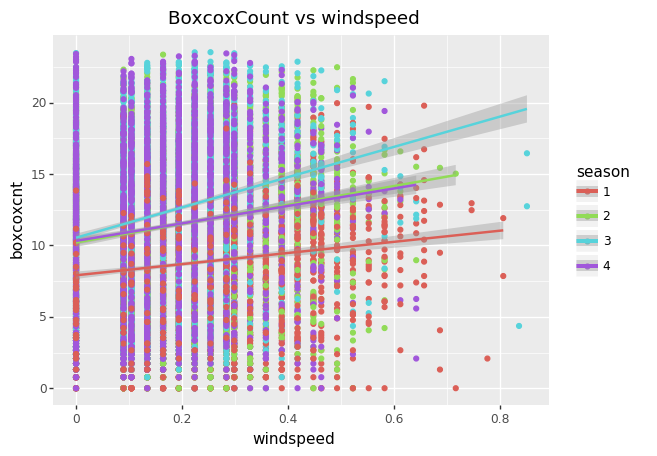

<ggplot: (-9223372036563094475)>

In [248]:
## Clearly, casual + registered = total count, so I'm not really going to be looking deeply into these 2 variables, since
## all I care about is the total count
(p9.ggplot(data = train_df,mapping = p9.aes(x = 'windspeed',y = 'boxcoxcnt',color = 'season')) + p9.geom_point() 
 + p9.stat_smooth(method = 'lm') + 
 p9.ggtitle("BoxcoxCount vs windspeed")) 


In [250]:
## Checking for correlated features - would be helpful for dimension reduction
train_df.corr()


,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count,lncount,boxcoxcnt
rec_id,1.000000,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379,0.202049,0.237422
temp,0.136178,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772,0.385724,0.414473
atemp,0.137615,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929,0.382619,0.411066
humidity,0.009577,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911,-0.335751,-0.353777
windspeed,-0.074505,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234,0.113496,0.113613
casual,0.158295,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564,0.575246,0.652640
registered,0.282046,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151,0.778950,0.885983
total_count,0.278379,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000,0.806352,0.916702
lncount,0.202049,0.385724,0.382619,-0.335751,0.113496,0.575246,0.778950,0.806352,1.000000,0.971159
boxcoxcnt,0.237422,0.414473,0.411066,-0.353777,0.113613,0.652640,0.885983,0.916702,0.971159,1.000000


In [254]:
## From this, I'd remove atemp, since it is heavily correlated with temp

## Also, as stated earlier, I'm not going to pursue analytics on casual vs registered, so the final dataset for 
##modeling would not contain casual and registered

## Similarly, I can remove total_count and lncount as well, since I've decided here from the distribution to 
## build my model on boxcoxcnt

df_for_model = train_df.drop(['total_count','lncount','casual','registered','atemp','datetime'],axis = 1)

In [255]:
df_for_model.head()

,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,humidity,windspeed,boxcoxcnt
0,1,1,0,1,0,0,6,0,1,0.24,0.81,0.0,4.361876
1,2,1,0,1,1,0,6,0,1,0.22,0.80,0.0,6.827897
2,3,1,0,1,2,0,6,0,1,0.22,0.80,0.0,6.162337
3,4,1,0,1,3,0,6,0,1,0.24,0.75,0.0,3.892645
4,5,1,0,1,4,0,6,0,1,0.24,0.75,0.0,0.000000


In [257]:
## Save dataframe as pickle for the predictive modeling exercise

df_for_model.to_pickle('model_df.pkl')

In [258]:
os.getcwd()

'/Users/vigneshramesh/Bike_sharing_exercise'